In [224]:
#load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [225]:
#Load the data set
data = pd.read_csv("bank-full.csv",sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [227]:
# Columns and their corresponding conversion mappings
columns_to_convert = {
    'y' : {'no': 0, 'yes': 1},
    'default': {'no': 0, 'yes': 1},
    'housing': {'no': 0, 'yes': 1},
    'loan': {'no': 0, 'yes': 1}
}

# Iterate over the columns and apply the conversion logic
for column, mapping in columns_to_convert.items():
    data[column] = data[column].map(mapping).astype("int64")

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


In [229]:
#Shape of the data set
data.shape

(45211, 17)

# Data Deep Dive Exploration:

In [230]:
# Looking at 'age'
data['age'].describe() 

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

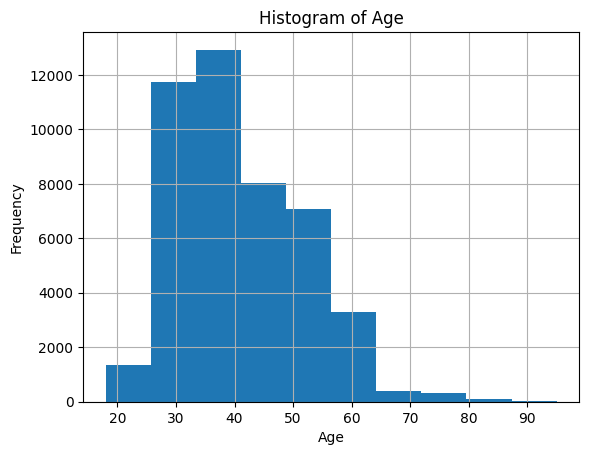

In [231]:
data['age'].hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [232]:
filt_age = data['y'] == 1
print(data.loc[filt_age]['age'].value_counts().head())
print(data.loc[filt_age]['age'].count()) #5k people.

age
32    221
30    217
33    210
35    209
31    206
Name: count, dtype: int64
5289


(array([ 320., 1462., 1295.,  726.,  648.,  497.,  148.,  138.,   48.,
           7.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

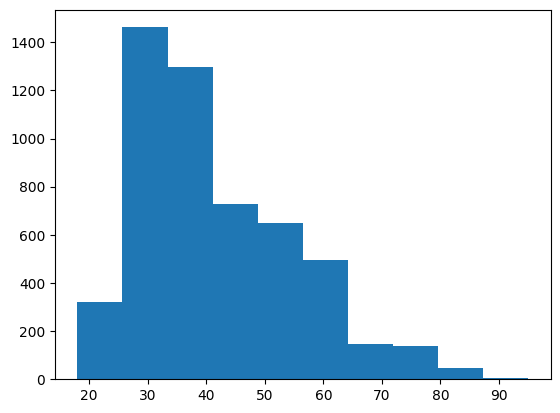

In [233]:
plt.hist(data.loc[filt_age]['age']) # number of people who actually took the term deposits.

In [234]:
#The diversity in age is too large and cannot be taken into account unless we split the age data into range.
data['age'] = data.assign(age=pd.cut(data['age'],bins=[18, 30, 40, 50, 60, 100],labels=['age18_29','age30_39','age40_49','age50_59','age60_100']))['age']

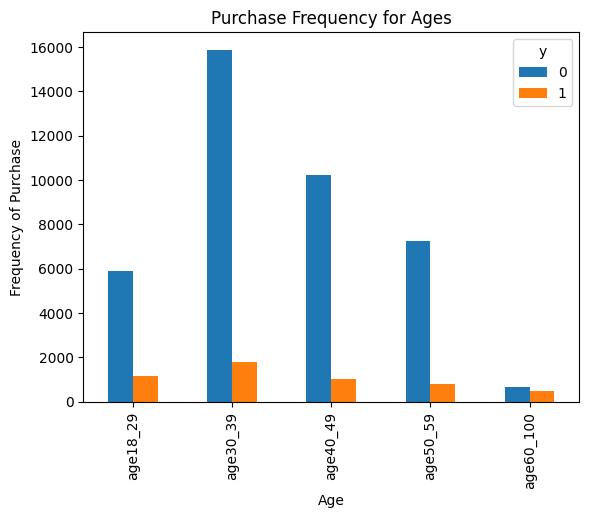

In [235]:
#Visulalization
pd.crosstab(data['age'],data['y']).plot(kind='bar')
plt.title('Purchase Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency of Purchase')
plt.show()

In [236]:
# Looking at 'job'
print(data['job'].unique()) 
print(data['job'].value_counts())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


In [237]:
job_cat = data.groupby('job') # Distribution of term deposits among various job categories.
job_cat['y'].value_counts() #Count Distribution

job            y
admin.         0    4540
               1     631
blue-collar    0    9024
               1     708
entrepreneur   0    1364
               1     123
housemaid      0    1131
               1     109
management     0    8157
               1    1301
retired        0    1748
               1     516
self-employed  0    1392
               1     187
services       0    3785
               1     369
student        0     669
               1     269
technician     0    6757
               1     840
unemployed     0    1101
               1     202
unknown        0     254
               1      34
Name: count, dtype: int64

In [238]:
filt_job = data['y'] == 1
data.loc[filt_job]['job'].value_counts(normalize = True) #Percentage distribution of people who bought the deposits.
#Mangement people are most likely to opt for the term deposists. 

job
management       0.245982
technician       0.158820
blue-collar      0.133863
admin.           0.119304
retired          0.097561
services         0.069767
student          0.050860
unemployed       0.038192
self-employed    0.035356
entrepreneur     0.023256
housemaid        0.020609
unknown          0.006428
Name: proportion, dtype: float64

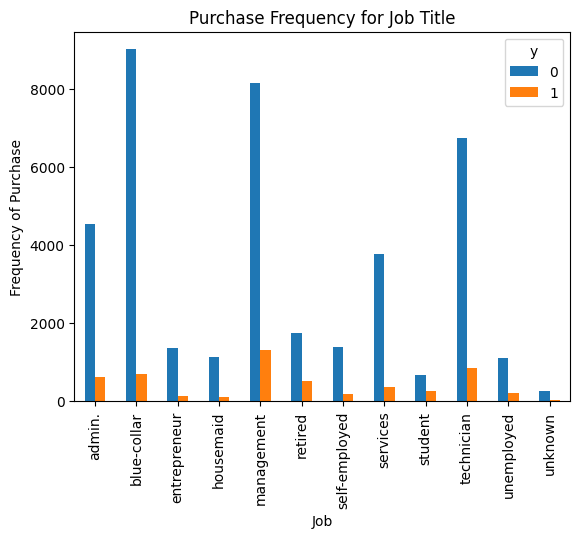

In [239]:
#Visulalization
pd.crosstab(data['job'],data['y']).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.show()

In [240]:
# Looking at 'marital' 
print(data['marital'].unique()) 
print(data['marital'].value_counts())

['married' 'single' 'divorced']
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


In [241]:
marital_cat = data.groupby('marital') # Distribution of term deposits among marital categories.
marital_cat['y'].value_counts() #Count Distribution

marital   y
divorced  0     4585
          1      622
married   0    24459
          1     2755
single    0    10878
          1     1912
Name: count, dtype: int64

In [242]:
filt_marital = data['y'] == 1
data.loc[filt_marital]['marital'].value_counts(normalize = True) #Percentage distribution of people who bought the deposits.

marital
married     0.520892
single      0.361505
divorced    0.117603
Name: proportion, dtype: float64

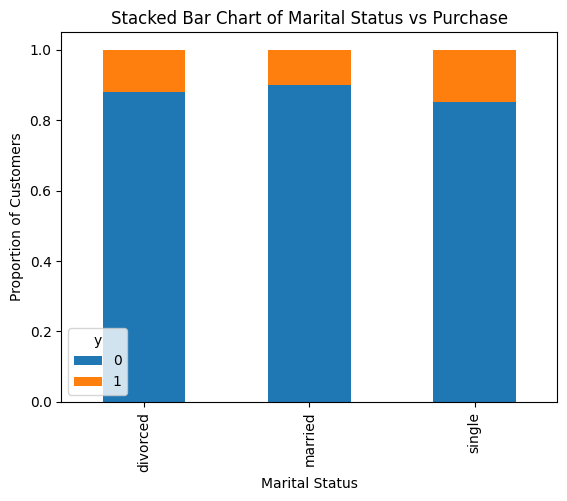

In [243]:
#Visualizations
table=pd.crosstab(data['marital'],data['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.show()

In [244]:
# Looking at 'education' 
print(data['education'].unique()) 
print(data['education'].value_counts())

['tertiary' 'secondary' 'unknown' 'primary']
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


In [245]:
educ_cat = data.groupby('education') # Distribution of term deposits among education categories.
educ_cat['y'].value_counts() #Count Distribution

education  y
primary    0     6260
           1      591
secondary  0    20752
           1     2450
tertiary   0    11305
           1     1996
unknown    0     1605
           1      252
Name: count, dtype: int64

In [246]:
filt_educ = data['y'] == 1
data.loc[filt_educ]['education'].value_counts(normalize = True) #Percentage distribution of people who bought the deposits.

education
secondary    0.463226
tertiary     0.377387
primary      0.111741
unknown      0.047646
Name: proportion, dtype: float64

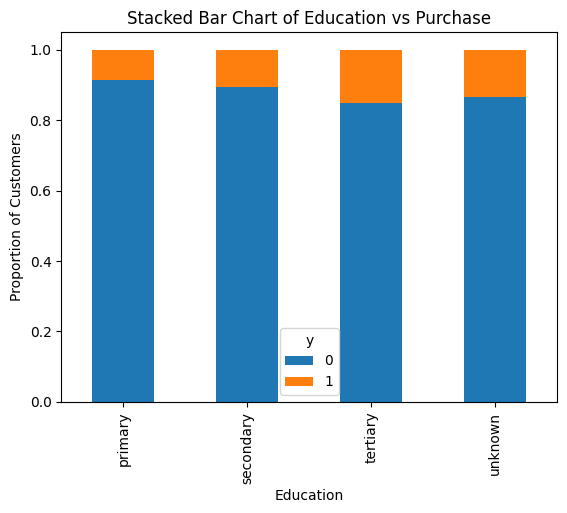

In [247]:
#Visualization
table=pd.crosstab(data['education'],data['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.show()

In [248]:
# Looking at 'contact' 
print(data['contact'].unique()) 
print(data['contact'].value_counts()) 

['unknown' 'cellular' 'telephone']
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


In [249]:
count_no_pdays = len(data[data['pdays']==-1])
count_no_pdays 

36954

In [250]:
data['contact'].value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [251]:
contact_verify = data.groupby('contact')
contact_verify['previous'].value_counts().tail(12)

contact  previous
unknown  0           12950
         2              24
         1              14
         3               8
         4               5
         5               5
         6               5
         7               4
         12              2
         11              1
         21              1
         41              1
Name: count, dtype: int64

In [252]:
#No of people who availed subscription after being contacted during campaign.
filt_pdays = data.pdays != -1 # == -1 means not contacted before in campaign.
data.loc[filt_pdays]['y'].value_counts(normalize = True)

y
0    0.769287
1    0.230713
Name: proportion, dtype: float64

In [253]:
# Looking at 'default' 
print(data['default'].unique()) 
print(data['default'].value_counts())

[0 1]
default
0    44396
1      815
Name: count, dtype: int64


In [254]:
default_cat = data.groupby('default') # Distribution of term deposits in default credit.
default_cat['y'].value_counts() #Count Distribution

default  y
0        0    39159
         1     5237
1        0      763
         1       52
Name: count, dtype: int64

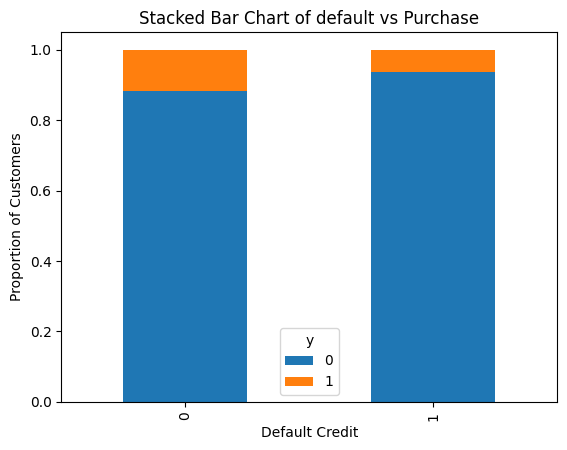

In [255]:
#Visualization
table=pd.crosstab(data['default'],data['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of default vs Purchase')
plt.xlabel('Default Credit')
plt.ylabel('Proportion of Customers')
plt.show()

In [256]:
# Looking at 'housing' 
print(data['housing'].unique()) 
print(data['housing'].value_counts()) # A lot of customers have opted for the housing loan

[1 0]
housing
1    25130
0    20081
Name: count, dtype: int64


In [257]:
housing_cat = data.groupby('housing') # Distribution of customers who opted for housing loan and term deposits.
housing_cat['y'].value_counts() #Count Distribution

housing  y
0        0    16727
         1     3354
1        0    23195
         1     1935
Name: count, dtype: int64

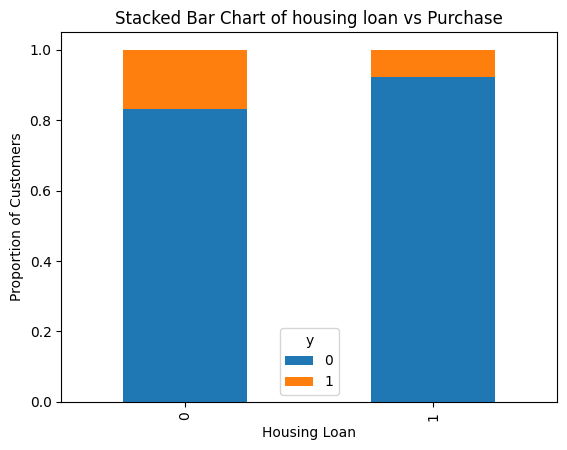

In [258]:
#Visualization
table=pd.crosstab(data['housing'],data['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of housing loan vs Purchase')
plt.xlabel('Housing Loan')
plt.ylabel('Proportion of Customers')
plt.show()

### Effect of loan on Term Subscription y

In [259]:
#Looking at 'loan' 
loan_cat = data.groupby('loan') # Distribution of customers who opted for personal loan and term deposits.
loan_cat['y'].value_counts() #Count Distribution

loan  y
0     0    33162
      1     4805
1     0     6760
      1      484
Name: count, dtype: int64

In [260]:
#Looking at 'Month' 
month_cat = data.groupby('month') # Variance in sales of y during various months
month_cat['y'].value_counts() #Count Distribution

month  y
apr    0     2355
       1      577
aug    0     5559
       1      688
dec    0      114
       1      100
feb    0     2208
       1      441
jan    0     1261
       1      142
jul    0     6268
       1      627
jun    0     4795
       1      546
mar    1      248
       0      229
may    0    12841
       1      925
nov    0     3567
       1      403
oct    0      415
       1      323
sep    0      310
       1      269
Name: count, dtype: int64

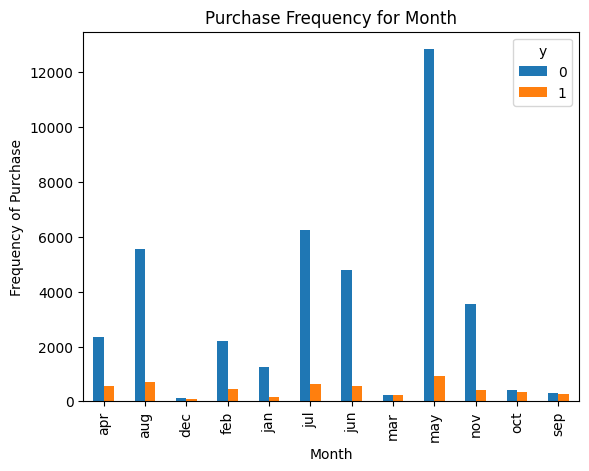

In [261]:
#Visulalization
pd.crosstab(data['month'],data['y']).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.show()

In [262]:
#Looking at 'Campaign' 
campaign_cat = data.groupby('campaign') # Variance in sales of y during various months
campaign_cat['y'].value_counts() #Count Distribution

campaign  y
1         0    14983
          1     2561
2         0    11104
          1     1401
3         0     4903
               ...  
50        0        2
51        0        1
55        0        1
58        0        1
63        0        1
Name: count, Length: 70, dtype: int64

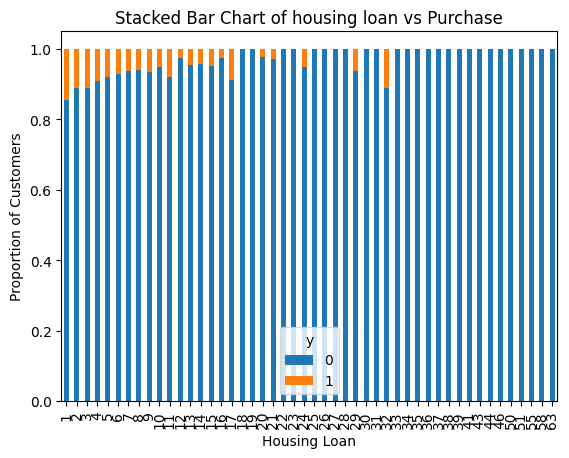

In [263]:
table=pd.crosstab(data['campaign'],data['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of housing loan vs Purchase')
plt.xlabel('Housing Loan')
plt.ylabel('Proportion of Customers')
plt.show()

In [264]:
# Looking at 'poutcome' 
print(data['poutcome'].unique()) 
print(data['poutcome'].value_counts()) #Note the number of Unknown values in this case. The dataset is critically flawed

['unknown' 'failure' 'other' 'success']
poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64


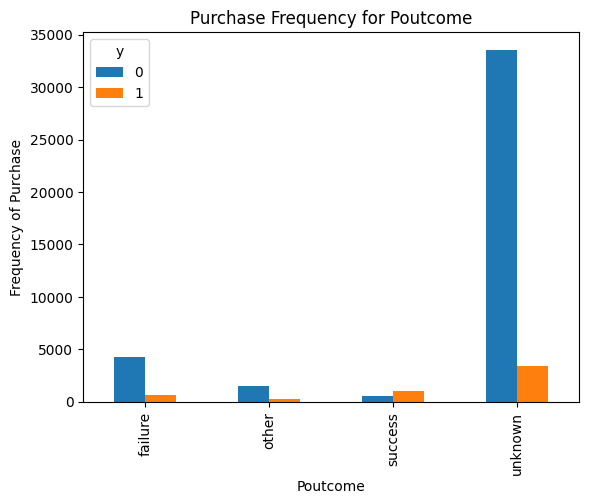

In [265]:
pd.crosstab(data['poutcome'],data['y']).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.show() #

#### Inferences:
    - Out of all the people contacted, few them have subscribed for the deposits.
    - This might be a good factor in determining y.
    - However, there is a large number of unknowns in this as well.
    - this variable will be considered in building the model.

# Final Data Columns

## Drop unused columns and create new dataset



In [266]:
dataclean = data.copy()
dataclean = dataclean.drop(['day','duration','balance','campaign','pdays','previous'], axis =1)
dataclean.head()


,age,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,age50_59,management,married,tertiary,0,1,0,unknown,may,unknown,0
1,age40_49,technician,single,secondary,0,1,0,unknown,may,unknown,0
2,age30_39,entrepreneur,married,secondary,0,1,1,unknown,may,unknown,0
3,age40_49,blue-collar,married,unknown,0,1,0,unknown,may,unknown,0
4,age30_39,unknown,single,unknown,0,0,0,unknown,may,unknown,0


## Creating Dummy Variable

- Items that require dummy variables: age, job, marital, education, contact, month, poutcome

In [267]:
dumy = ['age','job','marital','education','contact','month','poutcome']
dataclean1 =  pd.get_dummies(dataclean,columns=['age','job','marital','education','contact','month','poutcome'])
#Getting column list via => cols = list(df.columns.values)
dataclean1 = dataclean1[['y','default','housing','loan','age_age18_29','age_age30_39','age_age40_49','age_age50_59', 'age_age60_100',
 'job_admin.','job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired','job_self-employed',
 'job_services','job_student','job_technician','job_unemployed','job_unknown','marital_divorced','marital_married',
 'marital_single','education_primary','education_secondary','education_tertiary','education_unknown','contact_cellular',
 'contact_telephone','contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
 'poutcome_success', 'poutcome_unknown']] #Rearranging the columns 
dataclean1.head()

,y,default,housing,loan,age_age18_29,age_age30_39,age_age40_49,age_age50_59,age_age60_100,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,1,0,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
1,0,0,1,0,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,0,0,1,1,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,0,0,1,0,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,0,0,0,0,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


# Logistic Modelling

## Defining dataset

In [268]:

# define dataset

X = dataclean1[['default','housing','loan','age_age18_29','age_age30_39','age_age40_49', 'age_age50_59','age_age60_100',
 'job_admin.','job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired','job_self-employed',
 'job_services','job_student','job_technician','job_unemployed','job_unknown','marital_divorced','marital_married',
 'marital_single','education_primary','education_secondary','education_tertiary','education_unknown','contact_cellular',
 'contact_telephone','contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
 'poutcome_success', 'poutcome_unknown']]
y = dataclean['y']

# Choosing between Recall and Precision

In this problem, predicting if a person has subscribed for a term deposit is not very critical. The costs for predicting wrong are not very critical. Hence we would go for Higher Precision. Since the dataset is highly biased, a more precise model is what we could work with.

# Removing Bias in dataset

- There is high bias in this dataset which needs to be resolved before modelling.

In [269]:
dataclean1.y.value_counts(normalize = True)
# HIGHLY BIASED DATASET WITH STRONG INCLINATION TOWARDS NO.
# Therefore, our model will have a strong bias associated with it. 
# This issue can be solved by using a combination of undersampling and oversampling together for best results.

y
0    0.883015
1    0.116985
Name: proportion, dtype: float64

# Method 1 - Using RandomUnderSampling & RandomOverSampling 

In [270]:
#Using Reference 1

from sklearn.datasets import make_classification
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#summarize class distribution
print(Counter(y))

# define pipeline
over = RandomOverSampler(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.6)
pipeline = Pipeline(steps=[('o', over), ('u', under)])

#Implementing the pipeline

X_res, y_res = pipeline.fit_resample(X, y)

#summarize class distribution
print(Counter(y_res))

Counter({0: 39922, 1: 5289})
Counter({0: 19960, 1: 11976})


# Fitting a logistic Regression Model (Method1)

In [271]:
from sklearn.linear_model import LogisticRegression
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X_res,y_res)

LogisticRegression()

In [272]:
#Predict for X dataset
y_pred = classifier.predict(X_res) 

In [273]:
y_pred_df= pd.DataFrame({'actual': y_res,'predicted_prob': classifier.predict(X_res)})
y_pred_df.head()

,actual,predicted_prob
9512,0,0
18869,0,0
30017,0,0
10453,0,0
40091,0,0


### Confusion Matrix & Classification Report (Method1)

In [274]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_res,y_pred)
print (confusion_matrix)

[[18315  1645]
 [ 6325  5651]]


In [275]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_res,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82     19960
           1       0.77      0.47      0.59     11976

    accuracy                           0.75     31936
   macro avg       0.76      0.69      0.70     31936
weighted avg       0.76      0.75      0.73     31936



In [276]:
classifier.predict_proba(X_res)

array([[0.74895007, 0.25104993],
       [0.65751407, 0.34248593],
       [0.7368584 , 0.2631416 ],
       ...,
       [0.58918365, 0.41081635],
       [0.0917369 , 0.9082631 ],
       [0.71356513, 0.28643487]])

###  ROC Curve and AUC Value (method1)

AUC vale:0.6947227788911156


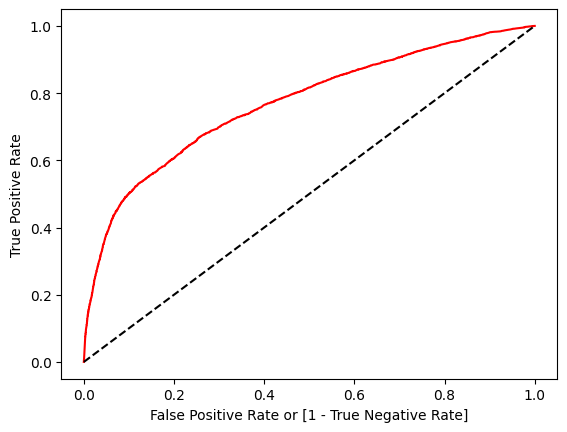

In [277]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, _ = roc_curve(y_res, classifier.predict_proba (X_res)[:,1])

auc = roc_auc_score(y_res, y_pred)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

print("AUC vale:"+str(auc))


# Using SMOTETomek (Method2)

In [278]:
#Using Reference 2
from imblearn.combine import SMOTETomek
from collections import Counter


# define dataset

X = dataclean1[['default','housing','loan','age_age18_29','age_age30_39','age_age40_49', 'age_age50_59','age_age60_100',
 'job_admin.','job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired','job_self-employed',
 'job_services','job_student','job_technician','job_unemployed','job_unknown','marital_divorced','marital_married',
 'marital_single','education_primary','education_secondary','education_tertiary','education_unknown','contact_cellular',
 'contact_telephone','contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
 'poutcome_success', 'poutcome_unknown']]
y = dataclean['y']

# summarize class distribution
print(Counter(y))

smt = SMOTETomek(sampling_strategy = 'auto')
X_res1, y_res1 = smt.fit_resample(X, y)

# summarize class distribution
print(Counter(y_res1))

Counter({0: 39922, 1: 5289})
Counter({0: 39762, 1: 39762})


# Fitting a logistic Regression Model (Method2)

In [279]:
#Logistic regression and fit the model
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_res1,y_res1)

LogisticRegression(max_iter=1000)

In [280]:
#Predict for X dataset
y_pred = classifier.predict(X_res1) 

In [281]:
y_pred_df= pd.DataFrame({'actual': y_res1,'predicted_prob': classifier.predict(X_res1)})
y_pred_df.head()

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


#### Confusion Matrix & Classification Report (Method1)

In [282]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_res1,y_pred)
print (confusion_matrix)

[[36495  3267]
 [ 9766 29996]]


In [283]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_res1,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85     39762
           1       0.90      0.75      0.82     39762

    accuracy                           0.84     79524
   macro avg       0.85      0.84      0.84     79524
weighted avg       0.85      0.84      0.84     79524



In [284]:
classifier.predict_proba(X_res1)

array([[0.88646646, 0.11353354],
       [0.88484594, 0.11515406],
       [0.98168184, 0.01831816],
       ...,
       [0.02915235, 0.97084765],
       [0.00196381, 0.99803619],
       [0.00565424, 0.99434576]])

####  ROC Curve and AUC Value (method1)

AUC value: 0.8361123685931291


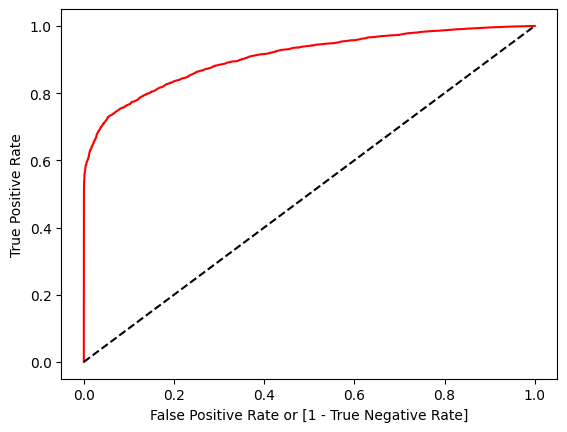

In [285]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, _ = roc_curve(y_res1, classifier.predict_proba (X_res1)[:,1])

auc1 = roc_auc_score(y_res1, y_pred)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

print("AUC value:", auc1)